In [28]:
from astropy.io import ascii
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

In [29]:
def yrecread(filename):
    yrec= ascii.read(filename, 
       format="fixed_width_no_header", 
       names=('Step', 'Shls', 'Age_gyr', 'LogL_lsun', 'LogR_rsun', 'Log_g', 'log_Teff', 'Mco_core', 'Mco_env', 'Rco_env', 
              'Tco_env', 'Dco_env', 'Pco_env', 'Oco_env', 'LogT_cen', 'LogD_cen', 'logP_cen', 'Beta_cen', 'Eta_cen', 'X_cen', 
              'Y_cen', 'Z_cen', 'ppI_lsun', 'ppII_lsun', 'ppIII_lsun', 'CNO_lsun', '3a_lsun', 'HeC_lsun', 'Egrav_lsun',
              'Neut_lsun', 'Cl_snu', 'Ga_snu', 'pp_neut', 'pep_neut', 'hep_neut', 'Be7_neut', 'B8_neut', 'N13_neut', 'O15_neut',
              'F17_neut', 'diag1', 'diag2', 'He3_cen', 'C12_cen', 'C13_cen', 'N14_cen', 'N15_cen', 'O16_cen', 'O17_cen', 'O18_cen',
              'He3_sur', 'C12_sur', 'C13_sur', 'N14_sur', 'N15_sur', 'O16_sur', 'O17_sur', 'O18_sur', ' H2_sur', 'Li6_sur', 
              'Li7_sur', 'Be9_sur', 'X_sur', 'Y_sur', 'Z_sur', 'Z_X_sur', 'Jtot', 'KE_rot_tot', 'I_tot', 'I_cz', 'Omega_sur', 
              'Omega_cen', 'Prot_sur_d', 'Vrot_kms', 'TauCZ_s', 'MHshell_base', 'MHshell_mid', 'MHshell_top', 'RHshell_base', 
              'RHShell_mid', 'RHshell_top', 'logP_phot', 'Mass_msun'),
       col_starts=(0,9, 17, 33, 50,65,81,98,113,129,137,149,161, 173, 185, 201, 217, 233, 249,265,281, 297,313, 329, 345,361,377,
                  393, 409, 425, 441, 451, 461, 471, 481, 491, 501, 511, 521, 531, 541, 551, 561, 577, 593, 609, 625, 641,
                   657, 673, 689, 705, 721, 737, 753, 769, 785, 801, 817, 833, 849, 865, 881, 897, 913, 929, 945, 961, 
                  977, 993, 1009, 1025, 1041, 1057, 1073, 1099, 1105, 1121, 1137, 1153, 1169, 1185, 1201) )
    return yrec

# Models before I changed anything

In [30]:
rot1last=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250827/public_out/Test_solar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10mod.last',
                 format='ascii', delimiter=' ', data_start=7, header_start=6)
rot1difflast=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250827/public_out/Test_solar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_difrot.last',
                 format='ascii', delimiter=' ', data_start=7, header_start=6)
rot1nodifflast=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250827/public_out/Test_solar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_nodifrot.last',
                 format='ascii', delimiter=' ', data_start=7, header_start=6)

(100.0, 22.0)

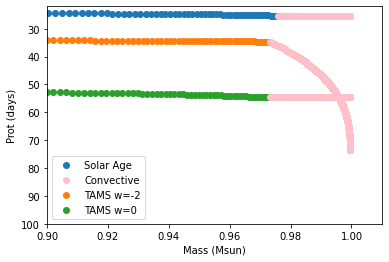

In [31]:
conv=np.where(rot1last['C']=='T')
convnodiff=np.where(rot1nodifflast['C']=='T')
convdiff=np.where(rot1difflast['C']=='T')
plt.figure()
plt.scatter(10**rot1last['MASS']/1.99e33, 2*3.14159/(60*60*24*rot1last['OMEGA']), label='Solar Age')
plt.scatter(10**rot1last['MASS'][conv]/1.99e33, 2*3.14159/(60*60*24*rot1last['OMEGA'][conv]), c='pink', label='Convective')

plt.scatter(10**rot1difflast['MASS']/1.99e33, 2*3.14159/(60*60*24*rot1difflast['OMEGA']), label='TAMS w=-2')
plt.scatter(10**rot1difflast['MASS'][convdiff]/1.99e33, 2*3.14159/(60*60*24*rot1difflast['OMEGA'][convdiff]), c='pink')

plt.scatter(10**rot1nodifflast['MASS']/1.99e33, 2*3.14159/(60*60*24*rot1nodifflast['OMEGA']), label='TAMS w=0')
plt.scatter(10**rot1nodifflast['MASS'][convnodiff]/1.99e33, 2*3.14159/(60*60*24*rot1nodifflast['OMEGA'][convnodiff]), c='pink')
plt.xlabel('Mass (Msun)')
plt.ylabel('Prot (days)')
plt.legend()
plt.xlim(0.9, 1.01)
plt.ylim(100, 22)

In [32]:
rot3=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250827/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_TAMS.track',
                 format='ascii', delimiter=' ') #, comment=';', data_start=9, header_start=8)
rot3last=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250827/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_TAMS.last',
                 format='ascii', delimiter=' ', data_start=7, header_start=6)
rot3RGp2nodiff=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250827/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2nodiffrot.track',
                 format='ascii', delimiter=' ') #, comment=';', data_start=9, header_start=8)
rot3RGp2nodifflast=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250827/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2nodiffrot.last',
                 format='ascii', delimiter=' ', data_start=7, header_start=6)
rot3RGp2diff=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250827/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2diffrot.track',
                 format='ascii', delimiter=' ') #, comment=';', data_start=9, header_start=8)
rot3RGp2difflast=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250827/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2diffrot.last',
                 format='ascii', delimiter=' ', data_start=7, header_start=6)

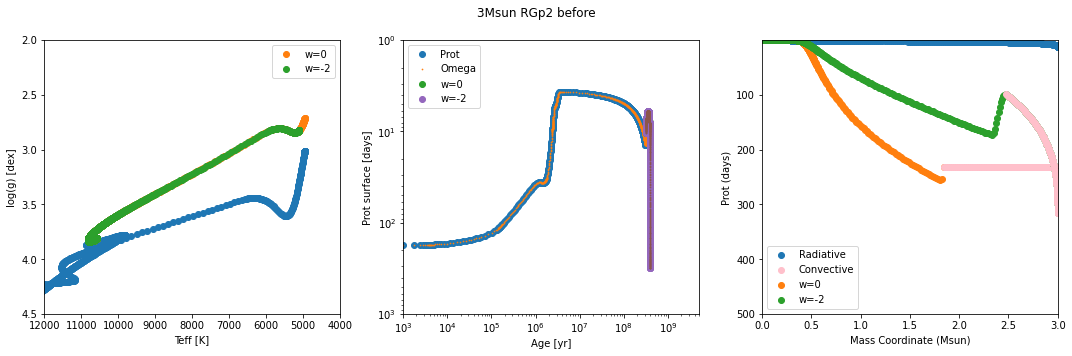

In [33]:
conv3M=np.where(rot3last['C']=='T')
conv3MRGp2nodiff=np.where(rot3RGp2nodifflast['C']=='T')
conv3MRGp2diff=np.where(rot3RGp2difflast['C']=='T')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('3Msun RGp2 before')
ax1.scatter(10**rot3['log_Teff'], rot3['Log_g'])
ax1.scatter(10**rot3RGp2nodiff['log_Teff'], rot3RGp2nodiff['Log_g'], label='w=0')
ax1.scatter(10**rot3RGp2diff['log_Teff'], rot3RGp2diff['Log_g'], label='w=-2')
ax1.legend()
ax1.set(xlabel='Teff [K]', ylabel='log(g) [dex]', xlim=(12000,4000), ylim=(4.5, 2.0))
ax2.scatter(rot3['Age_gyr']*1e9, rot3['Prot_sur_d'], label='Prot')
ax2.scatter(rot3['Age_gyr']*1e9, 2*3.14159/(60*60*24*rot3['Omega_sur']), s=0.5, label='Omega')
ax2.scatter(rot3RGp2nodiff['Age_gyr']*1e9, rot3RGp2nodiff['Prot_sur_d'], label='w=0')
ax2.scatter(rot3RGp2nodiff['Age_gyr']*1e9, 2*3.14159/(60*60*24*rot3RGp2nodiff['Omega_sur']), s=0.5)
ax2.scatter(rot3RGp2diff['Age_gyr']*1e9, rot3RGp2diff['Prot_sur_d'], label='w=-2')
ax2.scatter(rot3RGp2diff['Age_gyr']*1e9, 2*3.14159/(60*60*24*rot3RGp2diff['Omega_sur']), s=0.5)
ax2.legend()
ax2.set(xlabel='Age [yr]', ylabel='Prot surface [days]', xlim=(1e3, 5e9),ylim=(1000, 1), yscale=('log'), xscale=('log') )
ax3.scatter(10**rot3last['MASS']/1.99e33, 2*3.14159/(60*60*24*rot3last['OMEGA']), label='Radiative')
ax3.scatter(10**rot3last['MASS'][conv3M]/1.99e33, 2*3.14159/(60*60*24*rot3last['OMEGA'][conv3M]), c='pink', label='Convective')
ax3.scatter(10**rot3RGp2nodifflast['MASS']/1.99e33, 2*3.14159/(60*60*24*rot3RGp2nodifflast['OMEGA']), label='w=0')
ax3.scatter(10**rot3RGp2nodifflast['MASS'][conv3MRGp2nodiff]/1.99e33, 2*3.14159/(60*60*24*rot3RGp2nodifflast['OMEGA'][conv3MRGp2nodiff]), c='pink')
ax3.scatter(10**rot3RGp2difflast['MASS']/1.99e33, 2*3.14159/(60*60*24*rot3RGp2difflast['OMEGA']), label='w=-2')
ax3.scatter(10**rot3RGp2difflast['MASS'][conv3MRGp2diff]/1.99e33, 2*3.14159/(60*60*24*rot3RGp2difflast['OMEGA'][conv3MRGp2diff]), c='pink')
ax3.legend()
ax3.set(xlabel='Mass Coordinate (Msun)', ylabel='Prot (days)', xlim=(0.0, 3), ylim=(500, 0.1))
fig.tight_layout()
# auto-adjust boundaries after you have added everything
fig.canvas.draw()
# make sure it updates (possibly unnecessary)
fig.savefig('3MsunRGp2before.jpg', bbox_inches='tight', dpi=600)

# after i changed wcz but before wczimp

In [34]:
rot3=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250827/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_TAMS.track',
                 format='ascii', delimiter=' ') #, comment=';', data_start=9, header_start=8)
rot3last=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250827/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_TAMS.last',
                 format='ascii', delimiter=' ', data_start=7, header_start=6)
rot3RGp2nodiff=yrecread('/home/jtayar/Desktop/RunDir/YREC/YREC20250903JT/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2nodiffrot.track')
rot3RGp2nodifflast=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250903JT/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2nodiffrot.last',
                 format='ascii', delimiter=' ', data_start=7, header_start=6)
rot3RGp2diff=yrecread('/home/jtayar/Desktop/RunDir/YREC/YREC20250903JT/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2diffrot.track')
rot3RGp2difflast=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250903JT/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2diffrot.last',
                 format='ascii', delimiter=' ', data_start=7, header_start=6)

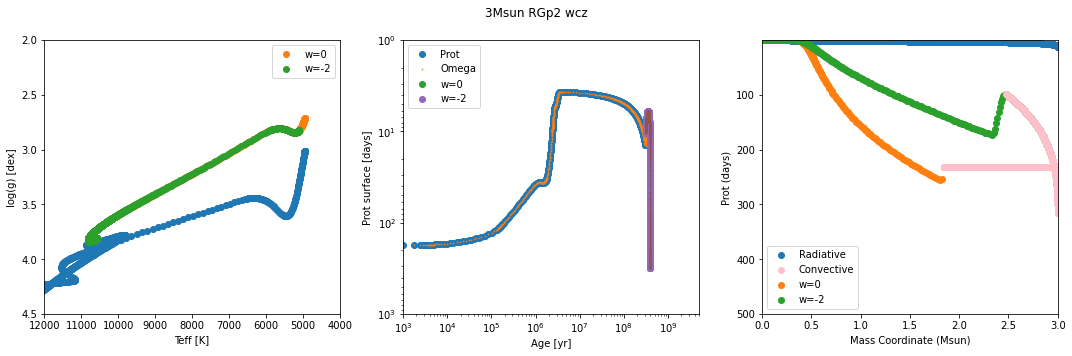

In [35]:
conv3M=np.where(rot3last['C']=='T')
conv3MRGp2nodiff=np.where(rot3RGp2nodifflast['C']=='T')
conv3MRGp2diff=np.where(rot3RGp2difflast['C']=='T')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('3Msun RGp2 wcz')
ax1.scatter(10**rot3['log_Teff'], rot3['Log_g'])
ax1.scatter(10**rot3RGp2nodiff['log_Teff'], rot3RGp2nodiff['Log_g'], label='w=0')
ax1.scatter(10**rot3RGp2diff['log_Teff'], rot3RGp2diff['Log_g'], label='w=-2')
ax1.legend()
ax1.set(xlabel='Teff [K]', ylabel='log(g) [dex]', xlim=(12000,4000), ylim=(4.5, 2.0))
ax2.scatter(rot3['Age_gyr']*1e9, rot3['Prot_sur_d'], label='Prot')
ax2.scatter(rot3['Age_gyr']*1e9, 2*3.14159/(60*60*24*rot3['Omega_sur']), s=0.5, label='Omega')
ax2.scatter(rot3RGp2nodiff['Age_gyr']*1e9, rot3RGp2nodiff['Prot_sur_d'], label='w=0')
ax2.scatter(rot3RGp2nodiff['Age_gyr']*1e9, 2*3.14159/(60*60*24*rot3RGp2nodiff['Omega_sur']), s=0.5)
ax2.scatter(rot3RGp2diff['Age_gyr']*1e9, rot3RGp2diff['Prot_sur_d'], label='w=-2')
ax2.scatter(rot3RGp2diff['Age_gyr']*1e9, 2*3.14159/(60*60*24*rot3RGp2diff['Omega_sur']), s=0.5)
ax2.legend()
ax2.set(xlabel='Age [yr]', ylabel='Prot surface [days]', xlim=(1e3, 5e9),ylim=(1000, 1), yscale=('log'), xscale=('log') )
ax3.scatter(10**rot3last['MASS']/1.99e33, 2*3.14159/(60*60*24*rot3last['OMEGA']), label='Radiative')
ax3.scatter(10**rot3last['MASS'][conv3M]/1.99e33, 2*3.14159/(60*60*24*rot3last['OMEGA'][conv3M]), c='pink', label='Convective')
ax3.scatter(10**rot3RGp2nodifflast['MASS']/1.99e33, 2*3.14159/(60*60*24*rot3RGp2nodifflast['OMEGA']), label='w=0')
ax3.scatter(10**rot3RGp2nodifflast['MASS'][conv3MRGp2nodiff]/1.99e33, 2*3.14159/(60*60*24*rot3RGp2nodifflast['OMEGA'][conv3MRGp2nodiff]), c='pink')
ax3.scatter(10**rot3RGp2difflast['MASS']/1.99e33, 2*3.14159/(60*60*24*rot3RGp2difflast['OMEGA']), label='w=-2')
ax3.scatter(10**rot3RGp2difflast['MASS'][conv3MRGp2diff]/1.99e33, 2*3.14159/(60*60*24*rot3RGp2difflast['OMEGA'][conv3MRGp2diff]), c='pink')
ax3.legend()
ax3.set(xlabel='Mass Coordinate (Msun)', ylabel='Prot (days)', xlim=(0.0, 3), ylim=(500, 0.1))
fig.tight_layout()
# auto-adjust boundaries after you have added everything
fig.canvas.draw()
# make sure it updates (possibly unnecessary)
fig.savefig('3MsunRGp2wcz.jpg', bbox_inches='tight', dpi=600)

# with wczimp

In [36]:
rot3=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250827/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_TAMS.track',
                 format='ascii', delimiter=' ') #, comment=';', data_start=9, header_start=8)
rot3last=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250827/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_TAMS.last',
                 format='ascii', delimiter=' ', data_start=7, header_start=6)
rot3RGp2nodiff=yrecread('/home/jtayar/Desktop/RunDir/YREC/YREC20250903JT/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2nodiffrotI0.track')
rot3RGp2nodifflast=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250903JT/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2nodiffrotI0.last',
                 format='ascii', delimiter=' ', data_start=7, header_start=6)
rot3RGp2diff=yrecread('/home/jtayar/Desktop/RunDir/YREC/YREC20250903JT/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2diffrotI0.track')
rot3RGp2difflast=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250903JT/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2diffrotI0.last',
                 format='ascii', delimiter=' ', data_start=7, header_start=6)

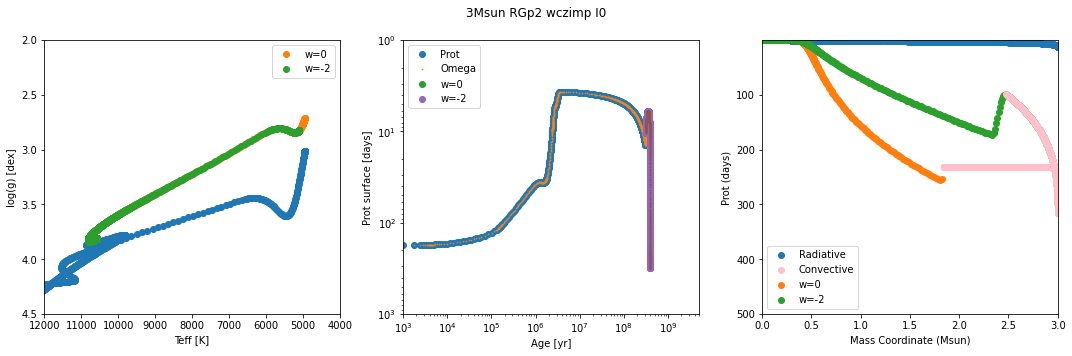

In [37]:
conv3M=np.where(rot3last['C']=='T')
conv3MRGp2nodiff=np.where(rot3RGp2nodifflast['C']=='T')
conv3MRGp2diff=np.where(rot3RGp2difflast['C']=='T')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('3Msun RGp2 wczimp I0')
ax1.scatter(10**rot3['log_Teff'], rot3['Log_g'])
ax1.scatter(10**rot3RGp2nodiff['log_Teff'], rot3RGp2nodiff['Log_g'], label='w=0')
ax1.scatter(10**rot3RGp2diff['log_Teff'], rot3RGp2diff['Log_g'], label='w=-2')
ax1.legend()
ax1.set(xlabel='Teff [K]', ylabel='log(g) [dex]', xlim=(12000,4000), ylim=(4.5, 2.0))
ax2.scatter(rot3['Age_gyr']*1e9, rot3['Prot_sur_d'], label='Prot')
ax2.scatter(rot3['Age_gyr']*1e9, 2*3.14159/(60*60*24*rot3['Omega_sur']), s=0.5, label='Omega')
ax2.scatter(rot3RGp2nodiff['Age_gyr']*1e9, rot3RGp2nodiff['Prot_sur_d'], label='w=0')
ax2.scatter(rot3RGp2nodiff['Age_gyr']*1e9, 2*3.14159/(60*60*24*rot3RGp2nodiff['Omega_sur']), s=0.5)
ax2.scatter(rot3RGp2diff['Age_gyr']*1e9, rot3RGp2diff['Prot_sur_d'], label='w=-2')
ax2.scatter(rot3RGp2diff['Age_gyr']*1e9, 2*3.14159/(60*60*24*rot3RGp2diff['Omega_sur']), s=0.5)
ax2.legend()
ax2.set(xlabel='Age [yr]', ylabel='Prot surface [days]', xlim=(1e3, 5e9),ylim=(1000, 1), yscale=('log'), xscale=('log') )
ax3.scatter(10**rot3last['MASS']/1.99e33, 2*3.14159/(60*60*24*rot3last['OMEGA']), label='Radiative')
ax3.scatter(10**rot3last['MASS'][conv3M]/1.99e33, 2*3.14159/(60*60*24*rot3last['OMEGA'][conv3M]), c='pink', label='Convective')
ax3.scatter(10**rot3RGp2nodifflast['MASS']/1.99e33, 2*3.14159/(60*60*24*rot3RGp2nodifflast['OMEGA']), label='w=0')
ax3.scatter(10**rot3RGp2nodifflast['MASS'][conv3MRGp2nodiff]/1.99e33, 2*3.14159/(60*60*24*rot3RGp2nodifflast['OMEGA'][conv3MRGp2nodiff]), c='pink')
ax3.scatter(10**rot3RGp2difflast['MASS']/1.99e33, 2*3.14159/(60*60*24*rot3RGp2difflast['OMEGA']), label='w=-2')
ax3.scatter(10**rot3RGp2difflast['MASS'][conv3MRGp2diff]/1.99e33, 2*3.14159/(60*60*24*rot3RGp2difflast['OMEGA'][conv3MRGp2diff]), c='pink')
ax3.legend()
ax3.set(xlabel='Mass Coordinate (Msun)', ylabel='Prot (days)', xlim=(0.0, 3), ylim=(500, 0.1))
fig.tight_layout()
# auto-adjust boundaries after you have added everything
fig.canvas.draw()
# make sure it updates (possibly unnecessary)
fig.savefig('3MsunRGp2wczimpI0.jpg', bbox_inches='tight', dpi=600)

# IMPJMOD 1,2,3

In [51]:
rot3=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250827/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_TAMS.track',
                 format='ascii', delimiter=' ') #, comment=';', data_start=9, header_start=8)
rot3last=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250827/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_TAMS.last',
                 format='ascii', delimiter=' ', data_start=7, header_start=6)
rot3RGp2nodiff=yrecread('/home/jtayar/Desktop/RunDir/YREC/YREC20250903JT/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2diffrotI1.track')
rot3RGp2nodifflast=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250903JT/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2diffrotI1.last',
                 format='ascii', delimiter=' ', data_start=7, header_start=6)
rot3RGp2diff=yrecread('/home/jtayar/Desktop/RunDir/YREC/YREC20250903JT/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2diffrotI2.track')
rot3RGp2difflast=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250903JT/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2diffrotI2.last',
                 format='ascii', delimiter=' ', data_start=7, header_start=6)
rot3RGp2diffi3=yrecread('/home/jtayar/Desktop/RunDir/YREC/YREC20250903JT/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2diffrotI3.track')
rot3RGp2diffi3last=Table.read('/home/jtayar/Desktop/RunDir/YREC/YREC20250903JT/public_out/Test_3Msolar_GS_rot_gray_OPALSCV_SF2_GS98_OP_CF10_RGp2diffrotI3.last',
                 format='ascii', delimiter=' ', data_start=7, header_start=6)

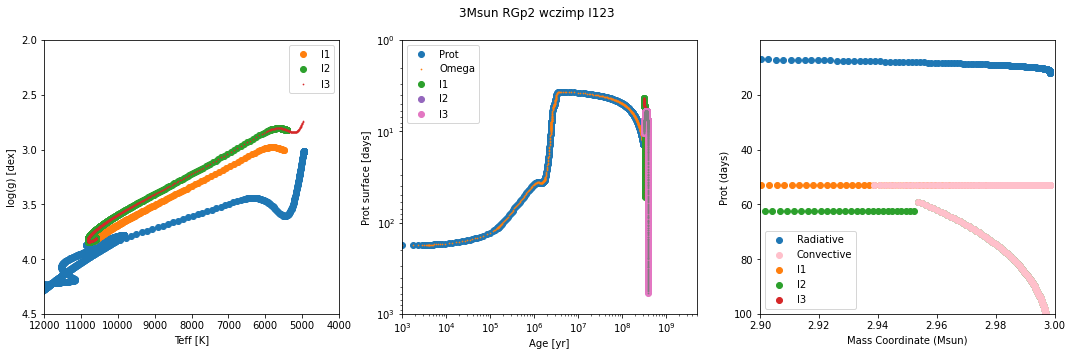

In [58]:
conv3M=np.where(rot3last['C']=='T')
conv3MRGp2nodiff=np.where(rot3RGp2nodifflast['C']=='T')
conv3MRGp2diff=np.where(rot3RGp2difflast['C']=='T')
conv3MRGp2diffi3=np.where(rot3RGp2diffi3last['C']=='T')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('3Msun RGp2 wczimp I123')
ax1.scatter(10**rot3['log_Teff'], rot3['Log_g'])
ax1.scatter(10**rot3RGp2nodiff['log_Teff'], rot3RGp2nodiff['Log_g'], label='I1')
ax1.scatter(10**rot3RGp2diff['log_Teff'], rot3RGp2diff['Log_g'], label='I2')
ax1.scatter(10**rot3RGp2diffi3['log_Teff'], rot3RGp2diffi3['Log_g'], s=0.5, label='I3')
ax1.legend()
ax1.set(xlabel='Teff [K]', ylabel='log(g) [dex]', xlim=(12000,4000), ylim=(4.5, 2.0))
ax2.scatter(rot3['Age_gyr']*1e9, rot3['Prot_sur_d'], label='Prot')
ax2.scatter(rot3['Age_gyr']*1e9, 2*3.14159/(60*60*24*rot3['Omega_sur']), s=0.5, label='Omega')
ax2.scatter(rot3RGp2nodiff['Age_gyr']*1e9, rot3RGp2nodiff['Prot_sur_d'], label='I1')
ax2.scatter(rot3RGp2nodiff['Age_gyr']*1e9, 2*3.14159/(60*60*24*rot3RGp2nodiff['Omega_sur']), s=0.5)
ax2.scatter(rot3RGp2diff['Age_gyr']*1e9, rot3RGp2diff['Prot_sur_d'], label='I2')
ax2.scatter(rot3RGp2diff['Age_gyr']*1e9, 2*3.14159/(60*60*24*rot3RGp2diff['Omega_sur']), s=0.5)
ax2.scatter(rot3RGp2diffi3['Age_gyr']*1e9, rot3RGp2diffi3['Prot_sur_d'], label='I3')
ax2.scatter(rot3RGp2diffi3['Age_gyr']*1e9, 2*3.14159/(60*60*24*rot3RGp2diffi3['Omega_sur']), s=0.5)
ax2.legend()
ax2.set(xlabel='Age [yr]', ylabel='Prot surface [days]', xlim=(1e3, 5e9),ylim=(1000, 1), yscale=('log'), xscale=('log') )
ax3.scatter(10**rot3last['MASS']/1.99e33, 2*3.14159/(60*60*24*rot3last['OMEGA']), label='Radiative')
ax3.scatter(10**rot3last['MASS'][conv3M]/1.99e33, 2*3.14159/(60*60*24*rot3last['OMEGA'][conv3M]), c='pink', label='Convective')
ax3.scatter(10**rot3RGp2nodifflast['MASS']/1.99e33, 2*3.14159/(60*60*24*rot3RGp2nodifflast['OMEGA']), label='I1')
ax3.scatter(10**rot3RGp2nodifflast['MASS'][conv3MRGp2nodiff]/1.99e33, 2*3.14159/(60*60*24*rot3RGp2nodifflast['OMEGA'][conv3MRGp2nodiff]), c='pink')
ax3.scatter(10**rot3RGp2difflast['MASS']/1.99e33, 2*3.14159/(60*60*24*rot3RGp2difflast['OMEGA']), label='I2')
ax3.scatter(10**rot3RGp2difflast['MASS'][conv3MRGp2diff]/1.99e33, 2*3.14159/(60*60*24*rot3RGp2difflast['OMEGA'][conv3MRGp2diff]), c='pink')
ax3.scatter(10**rot3RGp2diffi3last['MASS']/1.99e33, 2*3.14159/(60*60*24*rot3RGp2diffi3last['OMEGA']), label='I3')
ax3.scatter(10**rot3RGp2diffi3last['MASS'][conv3MRGp2diffi3]/1.99e33, 2*3.14159/(60*60*24*rot3RGp2diffi3last['OMEGA'][conv3MRGp2diffi3]), c='pink')
ax3.legend()
ax3.set(xlabel='Mass Coordinate (Msun)', ylabel='Prot (days)', xlim=(2.9, 3), ylim=(100, 0.01)) #, yscale=('log'))
fig.tight_layout()
# auto-adjust boundaries after you have added everything
fig.canvas.draw()
# make sure it updates (possibly unnecessary)
fig.savefig('3MsunRGp2wczimpI123.jpg', bbox_inches='tight', dpi=600)